In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install scipy


In [3]:
df = pd.read_csv("twitter_disaster.csv")

In [4]:
df.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...  

In [5]:
df.shape

(7613, 5)

In [6]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

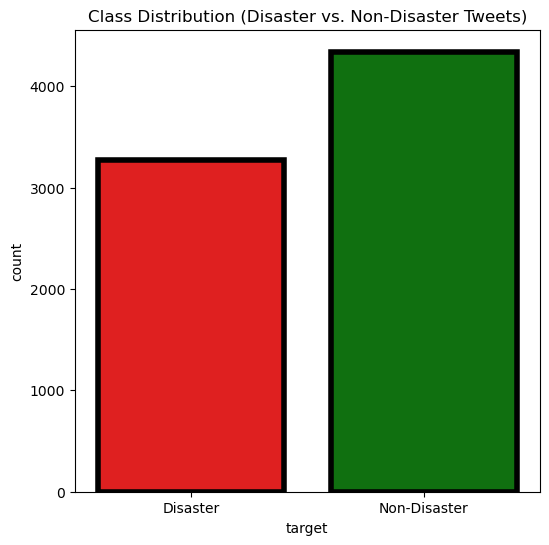

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['target'].astype(str), hue=df['target'].astype(str), palette={"0": "green", "1": "red"}, edgecolor="black", linewidth=4, legend=False)
plt.xticks(ticks=[0, 1], labels=["Disaster", "Non-Disaster"])
plt.title("Class Distribution (Disaster vs. Non-Disaster Tweets)")
plt.show()

In [8]:
pip install wordcloud

In [9]:
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean, tokenize, and lemmatize tweets
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & stopword removal
    
    return ' '.join(tokens)  # Return cleaned text



# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Filter disaster tweets (target = 1) - assuming we have a target column

disaster_tweets = df[df['target'] == 1]['clean_text']

print(df[['text', 'clean_text']])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ppppr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ppppr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ppppr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                   text  \
0     Our Deeds are the Reason of this #earthquake M...   
1                Forest fire near La Ronge Sask. Canada   
2     All residents asked to 'shelter in place' are ...   
3     13,000 people receive #wildfires evacuation or...   
4     Just got sent this photo from Ruby #Alaska as ...   
...                                                 ...   
7608  Two giant cranes holding a bridge collapse int...   
7609  @aria_ahrary @TheTawniest The out of control w...   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   
7611  Police investigating after an e-bike collided ...   
7612  The Latest: More Homes Razed by Northern Calif...   

                                             clean_text  
0            deed reason earthquake may allah forgive u  
1                 forest fire near la ronge sask canada  
2     resident asked shelter place notified officer ...  
3     people receive wildfire evacuation order calif...  
4

In [10]:
df['clean_text']

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident asked shelter place notified officer ...
3       people receive wildfire evacuation order calif...
4       got sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    ariaahrary thetawniest control wild fire calif...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest home razed northern california wildfire...
Name: clean_text, Length: 7613, dtype: object

In [11]:
df.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @aria_ahrary @TheTawniest The out of contro

In [12]:
# Tokenize words
all_words = ' '.join(disaster_tweets).split()
word_freq = Counter(all_words)




In [13]:
import pickle
import os
# Load or create tokenizer
TOKENIZER_PATH = "tokenizer.pkl"
if os.path.exists(TOKENIZER_PATH):
    with open(TOKENIZER_PATH, "rb") as f:
        tokenizer = pickle.load(f)
else:
    tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
    tokenizer.fit_on_texts(df['clean_text'])
    with open(TOKENIZER_PATH, "wb") as f:
        pickle.dump(tokenizer, f)


In [14]:
df.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @aria_ahrary @TheTawniest The out of contro

In [15]:
# Display top 10 most common words
print("Most Common Words in Disaster Tweets:")
print(word_freq.most_common(10))


Most Common Words in Disaster Tweets:
[('fire', 264), ('news', 140), ('via', 121), ('disaster', 118), ('california', 115), ('suicide', 110), ('u', 107), ('police', 107), ('amp', 107), ('people', 106)]


In [16]:
# Generate bigrams and trigrams
def get_ngrams(text_series, n):
    ngram_list = []
    for text in text_series:
        tokens = text.split()
        ngram_list.extend(list(ngrams(tokens, n)))
    return Counter(ngram_list).most_common(10)

# Get top 10 bigrams & trigrams
bigrams = get_ngrams(disaster_tweets, 2)
trigrams = get_ngrams(disaster_tweets, 3)

print("Most Common Bigrams:", bigrams)
print("Most Common Trigrams:", trigrams)


Most Common Bigrams: [(('suicide', 'bomber'), 60), (('northern', 'california'), 41), (('oil', 'spill'), 38), (('california', 'wildfire'), 36), (('burning', 'building'), 35), (('suicide', 'bombing'), 34), (('bomber', 'detonated'), 30), (('confirmed', 'mh'), 29), (('yr', 'old'), 29), (('home', 'razed'), 29)]
Most Common Trigrams: [(('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'home', 'razed'), 28), (('home', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', 'bomb'), 28), (('razed', 'northern', 'california'), 27), (('yr', 'old', 'pkk'), 27), (('old', 'pkk', 'suicide'), 27), (('family', 'sue', 'legionnaire'), 26)]


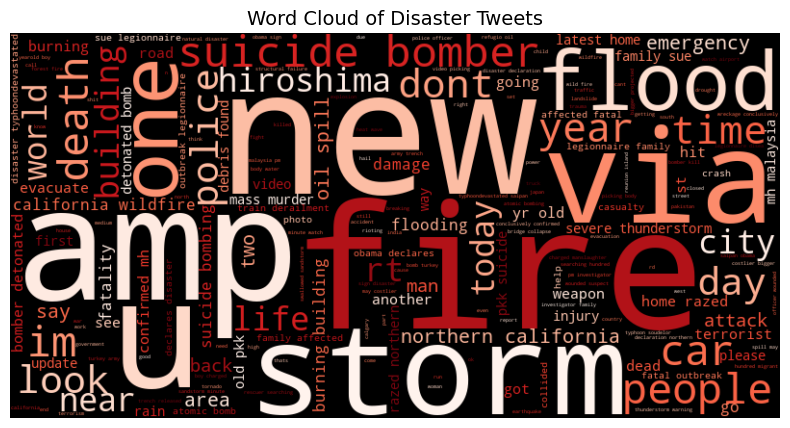

In [17]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(disaster_tweets))

# Display word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Disaster Tweets", fontsize=14)
plt.show()


C:\Users\ppppr\AppData\Local\Temp\ipykernel_2584\1970557120.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_df, palette="Reds_r")


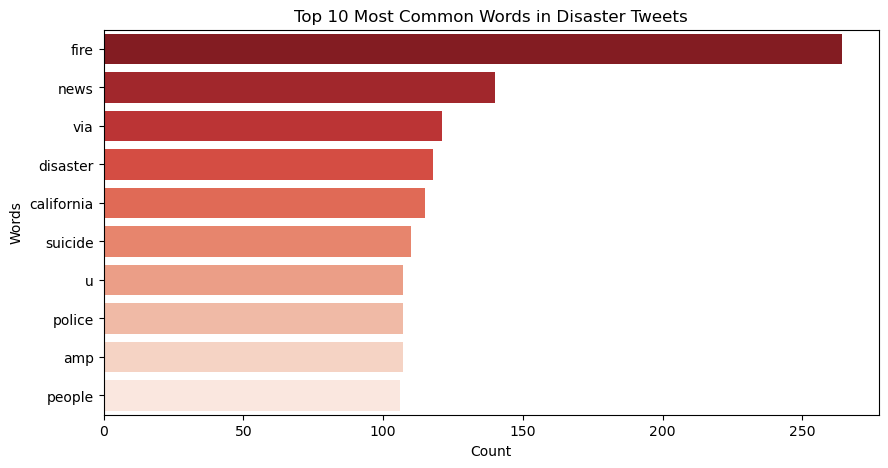

In [18]:
import seaborn as sns

# Convert to DataFrame
word_df = pd.DataFrame(word_freq.most_common(10), columns=['Word', 'Frequency'])

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x='Frequency', y='Word', data=word_df, palette="Reds_r")
plt.title("Top 10 Most Common Words in Disaster Tweets")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()


C:\Users\ppppr\AppData\Local\Temp\ipykernel_2584\656031064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Phrase', data=bigram_df, palette="Reds_r")


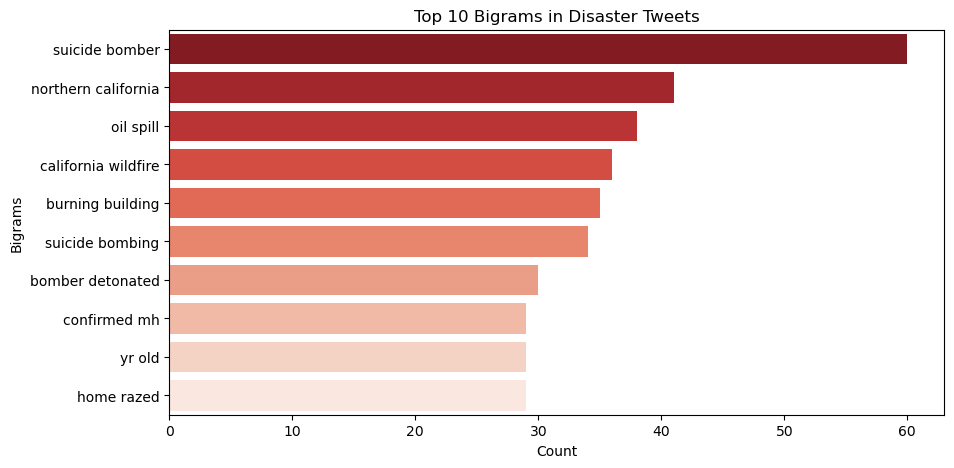

C:\Users\ppppr\AppData\Local\Temp\ipykernel_2584\656031064.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Phrase', data=trigram_df, palette="Blues_r")


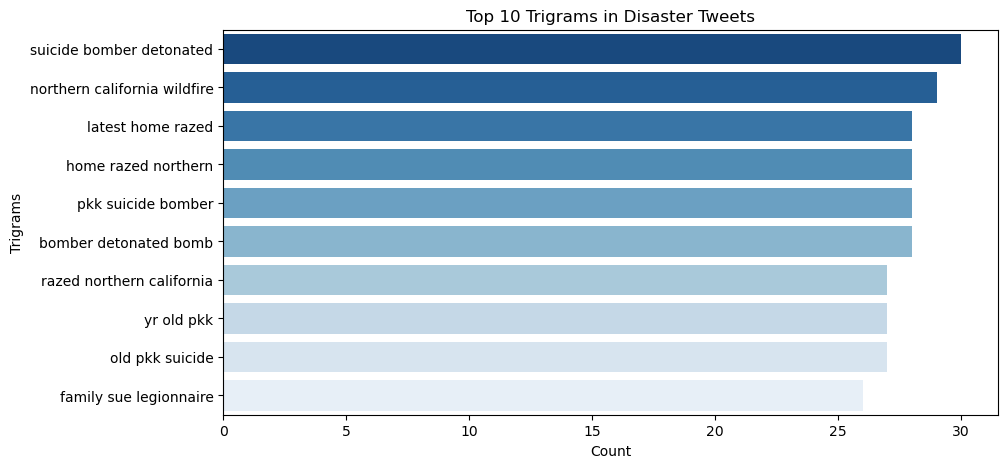

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert bigrams & trigrams to DataFrame
bigram_df = pd.DataFrame(bigrams, columns=['Phrase', 'Count'])
trigram_df = pd.DataFrame(trigrams, columns=['Phrase', 'Count'])

# Convert tuple phrases to strings
bigram_df['Phrase'] = bigram_df['Phrase'].apply(lambda x: ' '.join(x))
trigram_df['Phrase'] = trigram_df['Phrase'].apply(lambda x: ' '.join(x))

# Plot Bigrams
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Phrase', data=bigram_df, palette="Reds_r")
plt.title("Top 10 Bigrams in Disaster Tweets")
plt.xlabel("Count")
plt.ylabel("Bigrams")
plt.show()

# Plot Trigrams
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Phrase', data=trigram_df, palette="Blues_r")
plt.title("Top 10 Trigrams in Disaster Tweets")
plt.xlabel("Count")
plt.ylabel("Trigrams")
plt.show()


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize vectorizers
count_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Apply vectorization
X_word_freq = count_vectorizer.fit_transform(df['clean_text'])
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

print("Shape of Word Frequency Features:", X_word_freq.shape)
print("Shape of TF-IDF Features:", X_tfidf.shape)


Shape of Word Frequency Features: (7613, 5000)
Shape of TF-IDF Features: (7613, 5000)


In [21]:
X_word_freq

<7613x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 55730 stored elements in Compressed Sparse Row format>

In [22]:
X_tfidf

<7613x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 55730 stored elements in Compressed Sparse Row format>

In [45]:
df1=df

In [47]:
df2=df

In [49]:
df3=df

In [51]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download sentiment lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df1['sentiment'] = df1['clean_text'].apply(lambda text: sia.polarity_scores(text)['compound'])

print(df1[['clean_text', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ppppr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          clean_text  sentiment
0         deed reason earthquake may allah forgive u     0.2732
1              forest fire near la ronge sask canada    -0.3400
2  resident asked shelter place notified officer ...     0.0000
3  people receive wildfire evacuation order calif...     0.0000
4  got sent photo ruby alaska smoke wildfire pour...     0.0000


In [53]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [57]:
import numpy as np
embedding_dict = {}
# Load GloVe embeddings (50D version)
embedding_dict = {}
with open("glove.6B.50d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_dict[word] = vector

print(f"Loaded {len(embedding_dict)} word vectors.")
#"C:\Users\ppppr\digi project 7\glove.6B.50d.txt"

Loaded 400000 word vectors.


In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize tweets
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df2['clean_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df2['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post')

# Create embedding matrix
vocab_size = len(tokenizer.word_index) + 1  # Include <OOV> token
embedding_dim = 50  # Using GloVe 50D
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    vector = embedding_dict.get(word)
    if vector is not None:
        embedding_matrix[i] = vector  # Use pre-trained embedding


In [61]:
import re

# Function to extract additional features
def extract_features(text):
    tweet_length = len(text)  # Character count
    word_count = len(text.split())  # Word count
    hashtag_count = len(re.findall(r"#\w+", text))  # Count hashtags
    mention_count = len(re.findall(r"@\w+", text))  # Count mentions
    return tweet_length, word_count, hashtag_count, mention_count

# Apply feature extraction
df[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = df['text'].apply(lambda x: pd.Series(extract_features(x)))

print(df[['text', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count']].head())


df1[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = df1['text'].apply(lambda x: pd.Series(extract_features(x)))

print(df1[['text', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count']].head())


df2[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = df2['text'].apply(lambda x: pd.Series(extract_features(x)))

print(df2[['text', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count']].head())


                                                text  tweet_length  \
0  Our Deeds are the Reason of this #earthquake M...            69   
1             Forest fire near La Ronge Sask. Canada            38   
2  All residents asked to 'shelter in place' are ...           133   
3  13,000 people receive #wildfires evacuation or...            65   
4  Just got sent this photo from Ruby #Alaska as ...            88   

   word_count  hashtag_count  mention_count  
0          13              1              0  
1           7              0              0  
2          22              0              0  
3           8              1              0  
4          16              2              0  
                                                text  tweet_length  \
0  Our Deeds are the Reason of this #earthquake M...            69   
1             Forest fire near La Ronge Sask. Canada            38   
2  All residents asked to 'shelter in place' are ...           133   
3  13,000 people receiv

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import scipy.sparse as sp

# Extract additional features
df[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = df['text'].apply(lambda x: pd.Series(extract_features(x)))

# Normalize additional features
scaler = MinMaxScaler()
df[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = scaler.fit_transform(df[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']])

# Combine features
X_combined = np.hstack((padded_sequences, df[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']].values))
y = df['target']

In [65]:
# Extract additional features
df1[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = df1['text'].apply(lambda x: pd.Series(extract_features(x)))

# Normalize additional features
scaler = MinMaxScaler()
df1[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = scaler.fit_transform(df1[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']])

# Combine features
X_combined1 = np.hstack((padded_sequences, df1[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']].values))
y1 = df1['target']

In [67]:
# Extract additional features
df2[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = df2['text'].apply(lambda x: pd.Series(extract_features(x)))

# Normalize additional features
scaler = MinMaxScaler()
df2[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']] = scaler.fit_transform(df2[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']])

# Combine features
X_combined2 = np.hstack((padded_sequences, df2[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']].values))
y2 = df2['target']

In [69]:


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


print("Final Feature Shape:", X_train.shape)  # Includes embeddings + extra features

X_test.shape

Final Feature Shape: (6090, 54)


(1523, 54)

In [71]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [75]:
y_pred = classifier.predict(X_test)
y_predfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))    
print("f1score:",f1_score(y_test, y_pred)) 

Accuracy: 0.5489166119500984
Precision: 0.4736111111111111
recall: 0.5254237288135594
f1score: 0.4981738495252009


In [79]:
# Train-Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_combined1, y, test_size=0.2, random_state=42)


print("Final Feature Shape:", X_train1.shape)  # Includes embeddings + extra features

X_test1.shape

Final Feature Shape: (6090, 54)


(1523, 54)

In [81]:
classifier = MultinomialNB()
classifier.fit(X_train1, y_train1)

MultinomialNB()

In [85]:
y_pred1 = classifier.predict(X_test1)

In [87]:
print("Accuracy:", accuracy_score(y_test1, y_pred1))
print("Precision:",precision_score(y_test1, y_pred1))
print("recall:",recall_score(y_test1, y_pred1))    
print("f1score:",f1_score(y_test1, y_pred1)) 

Accuracy: 0.5489166119500984
Precision: 0.4736111111111111
recall: 0.5254237288135594
f1score: 0.4981738495252009


In [89]:
# Train-Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_combined2, y, test_size=0.2, random_state=42)


print("Final Feature Shape:", X_train2.shape)  # Includes embeddings + extra features

X_test2.shape

Final Feature Shape: (6090, 54)


(1523, 54)

In [91]:
classifier = MultinomialNB()
classifier.fit(X_train2, y_train2)

MultinomialNB()

In [93]:
y_pred2 = classifier.predict(X_test2)

In [95]:
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Precision:",precision_score(y_test2, y_pred2))
print("recall:",recall_score(y_test2, y_pred2))    
print("f1score:",f1_score(y_test2, y_pred2)) 

Accuracy: 0.5489166119500984
Precision: 0.4736111111111111
recall: 0.5254237288135594
f1score: 0.4981738495252009


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import  GradientBoostingClassifier

In [99]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.5705843729481287


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
log_model1 = LogisticRegression()
log_model1.fit(X_train1, y_train1)
y_pred_log1 = log_model1.predict(X_test1)
print("Logistic Regression Accuracy:", accuracy_score(y_test1, y_pred_log1))

Logistic Regression Accuracy: 0.5705843729481287


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.6841759684832567


In [105]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.690741956664478


In [107]:
gb_model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model1.fit(X_train1, y_train1)
y_pred_gb1 = gb_model1.predict(X_test1)
print("Gradient Boosting Accuracy:", accuracy_score(y_test1, y_pred_gb1))

Gradient Boosting Accuracy: 0.690741956664478


In [109]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [111]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [113]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5558 - loss: 0.6883 - val_accuracy: 0.5739 - val_loss: 0.6827
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5607 - loss: 0.6863 - val_accuracy: 0.5739 - val_loss: 0.6822
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5676 - loss: 0.6855 - val_accuracy: 0.5739 - val_loss: 0.6824
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5702 - loss: 0.6840 - val_accuracy: 0.5739 - val_loss: 0.6822
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5708 - loss: 0.6839 - val_accuracy: 0.5739 - val_loss: 0.6827
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5673 - loss: 0.6848 - val_accuracy: 0.5739 - val_loss: 0.6823
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5832 - loss: 0.6798 - val_accuracy: 0.5739 - val_loss: 0.6837
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5739 - loss: 0.6831 - val_acc

In [127]:
pip install dash


In [142]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle


model.save("lstm_model.h5")

# Load the model for prediction
loaded_model = load_model("lstm_model.h5")

# Dummy tokenizer (replace with actual tokenizer used during training)
tokenizer = {"word_index": {"example": 1}}  # Placeholder

# Dash App
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("LSTM Model Prediction"),
    dcc.Input(id='text_input', type='text', placeholder='Enter text...'),
    html.Button('Predict', id='predict_button', n_clicks=0),
    html.Div(id='prediction_output')
])

@app.callback(
    Output('prediction_output', 'children'),
    Input('predict_button', 'n_clicks'),
    Input('text_input', 'value')
)
def predict(n_clicks, text):
    if n_clicks > 0 and text:
        # Preprocess input text (dummy processing, replace with actual tokenizer)
        sequence = np.array([[tokenizer['word_index'].get(word, 0) for word in text.split()]])
        sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=100)
        prediction = loaded_model.predict(sequence)[0][0]
        result = "Disaster" if prediction >= 0.5 else "Not a Disaster"
        return f'Prediction: {result}'
    return ''

if __name__ == '__main__':
    app.run_server(debug=True)


In [1]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import model_from_json
import pickle


# Save the model using Pickle format (separate weights and architecture)
def save_model(model, filename="model.pkl"):
    # Save the model architecture (JSON format)
    model_json = model.to_json()
    
   
    # Save architecture using Pickle
    with open(filename, "wb") as f:
        pickle.dump(model_json, f)


# Load the model from Pickle
def load_model_from_pickle(filename="model.pkl"):
    # Load model architecture (JSON format)
    with open(filename, "rb") as f:
        model_json = pickle.load(f)
    
    # Recreate the model from the architecture
    model = model_from_json(model_json)
    
    
    return model



save_model(model)

# Load the model for prediction (in your app)
loaded_model = load_model_from_pickle()

# Dummy tokenizer (replace with actual tokenizer used during training)
tokenizer = {"word_index": {"example": 1}}  # Placeholder

# Dash App
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("LSTM Model Prediction"),
    dcc.Input(id='text_input', type='text', placeholder='Enter text...'),
    html.Button('Predict', id='predict_button', n_clicks=0),
    html.Div(id='prediction_output')
])

@app.callback(
    Output('prediction_output', 'children'),
    Input('predict_button', 'n_clicks'),
    Input('text_input', 'value')
)
def predict(n_clicks, text):
    if n_clicks > 0 and text:
        # Preprocess input text (dummy processing, replace with actual tokenizer)
        sequence = np.array([[tokenizer['word_index'].get(word, 0) for word in text.split()]])
        sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=100)
        prediction = loaded_model.predict(sequence)[0][0]
        result = "Disaster" if prediction >= 0.5 else "Not a Disaster"
        return f'Prediction: {result}'
    return ''

if __name__ == '__main__':
    app.run_server(debug=True)


NameError: name 'model' is not defined